In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r'C:\Users\darck\OneDrive\Desktop\ALL\DataSets\fireData.xlsx'
       
df = pd.read_excel(path)

In [3]:
print(df.shape)
df.head()

(729, 15)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,1,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,1,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,1,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,1,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,1,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          729 non-null    int64  
 1   month        729 non-null    int64  
 2   year         729 non-null    int64  
 3   Temperature  729 non-null    int64  
 4   RH           729 non-null    int64  
 5   Ws           729 non-null    int64  
 6   Rain         729 non-null    float64
 7   FFMC         729 non-null    float64
 8   DMC          729 non-null    float64
 9   DC           729 non-null    float64
 10  ISI          729 non-null    float64
 11  BUI          729 non-null    float64
 12  FWI          729 non-null    float64
 13  Classes      729 non-null    object 
 14  Region       729 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 85.6+ KB


In [29]:
df[df.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
df1 = df.iloc[:,3:13]

In [30]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [8]:
#Connstruire une matrice de corrélation pour montere la relation entre les variables   
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000


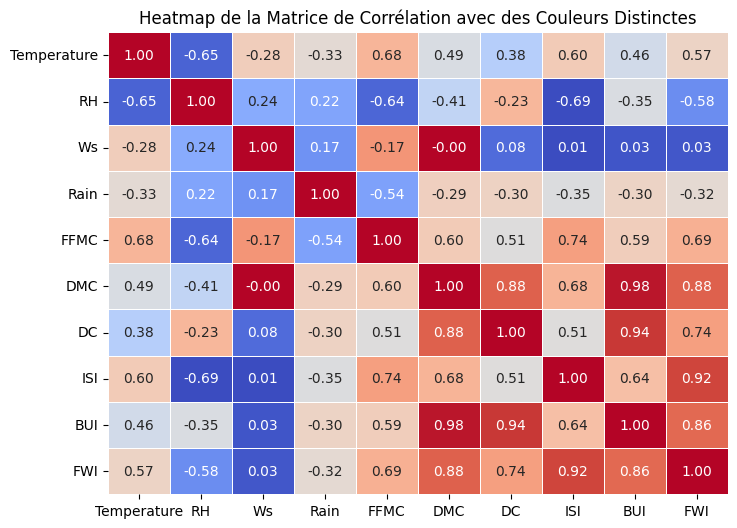

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            mask=df1.corr() >= 0, cbar=False)
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            mask=df1.corr() < 0, cbar=False)
plt.title('Heatmap de la Matrice de Corrélation avec des Couleurs Distinctes')
plt.show()

In [34]:
# drop features which has correlation more than 0.8
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

NameError: name 'X_train' is not defined

In [10]:
#Copier le dataframe pour ne pas perdre les données
data = df.copy()

In [11]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,1,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,1,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,1,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,1,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,1,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [12]:
#Rendre les données catégoriques en données numériques pour les utiliser dans le modèle
data['Classes'].replace({'not fire' : 0 , 'fire' : 1}, inplace=True)

<Axes: xlabel='Classes'>

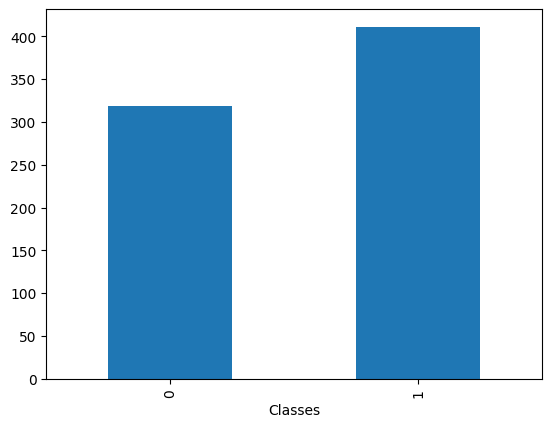

In [13]:
data.groupby('Classes').size().plot(kind='bar')

<Axes: xlabel='month'>

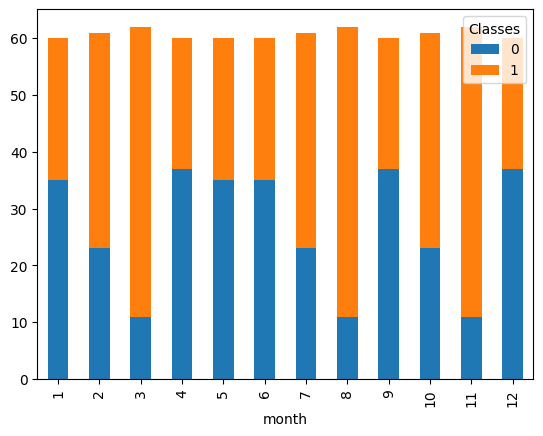

In [14]:
#la répartirion des classes par mois
data.groupby('month')['Classes'].value_counts().unstack().plot(kind='bar', stacked=True)

In [15]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,1,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,1,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,1,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,1,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,1,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [16]:
#Combien de regions existent dans le dataset
data.groupby('Region')['Temperature'].count()

Region
1    366
2    363
Name: Temperature, dtype: int64

In [17]:
#La dataset est pour l'année 2012
df.groupby('year').count()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
year,,,,,,,,,,,,,,
2012,729,729,729,729,729,729,729,729,729,729,729,729,729,729


In [18]:
#Mise en ordre les données pour faciliter le model
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [19]:
data = data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes']]

In [20]:
#Importer les librairies pour la construction du modèle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [21]:
#Construire le modéle
x = data.iloc[:,:14]
y = data.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [31]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

C:\Users\darck\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_predict = logistic.predict(x_test)

In [33]:
y_predict

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [25]:
y_test.head()

122    0
278    1
364    0
460    0
587    1
Name: Classes, dtype: int64

In [26]:
#Calculer la précision du modèle par les metrics
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_predict)
mae = metrics.mean_absolute_error(y_test, y_predict)

In [27]:
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 0.0136986301369863
Mean Absolute Error: 0.0136986301369863
